# 0. How will work my Deep Neural Network

<u>**TEXT:**</u>
    1. Initialize neural network
    2. Loop:
        - forward propagation;
        - compute cost;
        - backward propagation;
        - update parameters;
    3. Use DNN to predict.
<u>** GENERAL CODE OF MAIN FUNCTION:**</u>
```python
def L_nn(X,Y, layers_dims, learning_rate = ..., print_cost = ..., num_epochs = ...):
        parameters = init_nn(layers_dims);  
        ...
        for epoch in range(num_epochs):
            ...
            AL, caches = model_forward(X,parameters); 
            ...
            cost = compute_cost(AL,Y);     
            ...
            grads = model_backward(AL, Y, caches);   
            ...
            parameters = update_parameters(grads, learning_rate, parameters);
            ...
        return parameters; 
```
Let's get started! 

# 1. Import required libraries

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from testCases_v4 import *
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# 2. Initialize neural network        

In [ ]:
def init_nn(layers_dims):
    """
    Arguments:
        layers_dims - turple of of size L (number nn layers). Each element  i.e layers_dims[i] is number
        of neurans in layer i.
        
    Return:
        parameters - dict weights of neural network ({"W1":[...],"b1":[...],...})  
    """
    parameters = dict();
    L = len (layers_dims) - 1;
    
    for l in range(1, L + 1): # l = 1,2,3...L
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*0.01;
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1));
        
    return parameters;

# 3. Activation functions

In [ ]:
def sigmoid(Z):
    """
    Arguments:
            Z - weighted sum of input for corresponding layer, i.e. for layer 2 Z2 = np.dot(W2,A1) + b2;
    
    Returns:
            Sigmoid value of Z
    """
    return 1/(1 + np.exp(-Z))

In [ ]:
def relu(Z):
    """
    Arguments:
            Z- weighted sum of input for corresponding layer, i.e. for layer 2 Z2 = np.dot(W2,A1) + b2;
            
    Returns: 
            ReLu value of Z (max(0,Z))
    """
    #print ('relu activation:')
    #print(Z.shape)
    #print (np.maximum(0,Z).shape)
    return np.maximum(0,Z);

In [ ]:
def divide_relu(Z):
    Z[Z<0] = 0
    Z[Z>0] = 1
    return Z

In [ ]:
def divide_sigmoid(Z):
    return sigmoid(Z)*(1 - sigmoid(Z));

# 4. Forward propagation

In [ ]:
def linear_forward(A_prev, W, b):
    Z = np.dot(W,A_prev) + b;
    #print('linear forward:')
    #print(A_prev.shape)
    #print(W.shape)
    #print(b.shape)
    #print (Z.shape)
    #print('-------')
    cache = Z
    return Z, cache;

In [ ]:
def linear_activation_forward(A_prev, W, b, activation):    
    Z, activation_cache = linear_forward(A_prev, W, b);
    #print ('linear_activ_forw:')
    #print(Z.shape)
    if activation == "relu":
        A = relu(Z);
    elif activation == "sigmoid":
        A = sigmoid(Z);
    #print (A.shape)
    #print('------------')
    linear_cache = (A_prev, W, b)
    caches = (linear_cache, activation_cache)
    return A, caches;

In [ ]:
def model_forward(X,parameters): 
    caches = [];
    L = len(parameters) // 2;
    A_prev = X;
    
    for l in range(1,L):
        W = parameters["W" + str(l)];
        b = parameters["b" + str(l)];
        A_prev, current_cache = linear_activation_forward(A_prev, W, b, activation = "relu");
        caches.append(current_cache);
     
    AL, current_cache = linear_activation_forward(A_prev, parameters["W" + str(L)], parameters["b" + str(L)], activation = "sigmoid" );
    caches.append(current_cache)
    return AL, caches;

# 5. Compute cost

In [ ]:
def compute_cost(AL, Y):
    m = Y.shape[1];
    return -np.sum(Y*np.log(AL) + (1 - Y)*np.log(1 - AL))/m

# 6. Backward propagation

In [ ]:
def linear_backward(linear_cache, dZ):
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]
    
    dW = np.dot(dZ, A_prev.transpose()) / m;
    db = np.sum(dZ, axis = 1, keepdims = True) / m;
    dA_prev = np.dot(W.transpose(),dZ)
    return dA_prev, dW, db

In [ ]:
def sigmoid_backward(Z, dA):
    return dA*divide_sigmoid(Z);

In [ ]:
def relu_backward(Z, dA):
    dZ = dA * divide_relu(Z);
    return dZ;

In [ ]:
def linear_activation_backward(dA, cache, activation):
    
    linear_cache, activation_cache = cache
    if activation == 'sigmoid':
        dZ = sigmoid_backward(activation_cache, dA)
        dA_prev, dW, db = linear_backward(linear_cache, dZ)
    elif activation == 'relu':
        dZ = relu_backward(activation_cache, dA)
        dA_prev, dW, db = linear_backward(linear_cache, dZ)
    
    return dA_prev, dW, db

In [ ]:
def model_backward(AL, Y, caches): 
    grads = dict();
    L = len(caches)
    
    dAL = - ( np.divide(Y,AL) - np.divide(1 - Y, 1 - AL));
    dA_prev = dAL
    current_cache = caches[L-1] # 0,1,2,...,L-1
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(  dAL, current_cache, activation = "sigmoid");
    for l in range(L - 1, 0, -1):
        current_cache = caches[l-1];
        grads["dA" + str(l-1)], grads["dW" + str(l)], grads["db" + str(l)] = linear_activation_backward(grads['dA' + str(l)], current_cache,  activation = "relu")
    return grads;

# 7. Update parameters

In [ ]:
def update_parameters (old_params, grads, learning_rate = 0.075):
    
    L = len(old_params) // 2
    
    for l in range(1, L + 1):
        old_params['W' + str(l)] = old_params['W' + str(l)] - learning_rate*grads['dW' + str(l)];
        old_params['b' + str(l)] = old_params['b' + str(l)] - learning_rate*grads['db' + str(l)];
    
    return old_params;

# 8. Join all components in one function

In [ ]:
def my_DNN_model(X, Y, layers_dims, X_valid,Y_valid, learning_rate = 0.0075, num_epochs = 3000, print_cost = True):
    
    parameters = init_nn(layers_dims)
    costs = dict()
    costs['train'] = list()
    costs['valid'] = list()
    
    for epoch in range(1, num_epochs + 1):
        AL, caches = model_forward(X=X,parameters=parameters)
        cost_train = compute_cost(AL=AL, Y=Y)
        #compute validation cost error
        AL_valid, caches_valid = model_forward(X = X_valid, parameters=parameters)
        cost_valid = compute_cost(AL=AL_valid,Y=Y_valid)
    
        if print_cost and epoch%100 == 0:
            print ("Cost after epoch " + str(epoch) + " : train = " + str(cost_train) + "; valid = " + str(cost_valid) )
            costs['train'].append(cost_train)
            costs['valid'].append(cost_valid)
            
        grads = model_backward(AL=AL, Y=Y, caches=caches)
        parameters = update_parameters(grads=grads,learning_rate=learning_rate, old_params=parameters)

    plot_cost_errors(costs, num_epochs, learning_rate)
    return parameters

In [ ]:
def plot_cost_errors(costs, num_epochs, learning_rate, image_name_to_save = 'errors.png'):
    
    plt.plot(range(100,num_epochs + 100,100),np.squeeze(costs['train']))
    plt.plot(range(100,num_epochs + 100,100), np.squeeze(costs['valid']))
    
    font = {'color':'black', 'fontname':'Arial', 'weight':'normal'}
    
    plt.ylabel('cost', size = 15, fontdict = font)
    plt.xlabel('iterations (per tens)', size = 15, fontdict = font)
             
    plt.title("Learning rate =" + str(learning_rate),  size = 20, color = 'black', fontname = 'Arial', weight = 'normal')
             
    plt.xticks(size = 12, color = 'black', fontname = 'Arial', weight = 'normal')
    plt.yticks(size = 12, color = 'black', fontname = 'Arial', weight = 'normal')
             
    plt.xlim(100,num_epochs)
    plt.legend(['Train error','Validation error'], loc = 'upper right')
    plt.savefig(image_name_to_save, bbox_inches  = 'tight')

In [ ]:
def predict(X,parameters):
    AL, caches = model_forward(X,parameters)
    targets = (AL > 0.5)
    return targets

In [15]:
def accuracy(y_pred, y_true):
    num_match = np.sum(y_pred*y_true) + np.sum((1-y_pred)*(1-y_true))
    m = y_pred.shape[1]
    return (num_match / m)*100

# 9. Using model for cats classification

## 9.1 Import required libraries

In [3]:
from matplotlib import pyplot as plt
from PIL import Image
import h5py
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (8,8)


C:\Users\user_2018\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 9.2 Import dataset

In [4]:
def load_data():
    train_dataset = h5py.File('../../../datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('../../../datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [7]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

## 9.3 Exploratory dataset analysis

**GENERAL PROPERTIES:**

In [8]:
print ("We have {} train images".format(train_x_orig.shape[0]))
print ("We have {} test images".format(test_x_orig.shape[0]))
print ("Each images size: {}".format(train_x_orig[0].shape[0:2]))

We have 209 train images
We have 50 test images
Each images size: (64, 64)


**SHAPES:**

In [9]:
print ("Shape of train_x_orig is {}".format(train_x_orig.shape))
print ("Shape of train_y is {}".format(train_y.shape))
print ("Shape of test_x_orig is {}".format(test_x_orig.shape))
print ("Shape of test_y is {}".format(test_y.shape))

Shape of train_x_orig is (209, 64, 64, 3)
Shape of train_y is (1, 209)
Shape of test_x_orig is (50, 64, 64, 3)
Shape of test_y is (1, 50)


**SHOW RANDOM PICTURE FROM TRAIN SET**

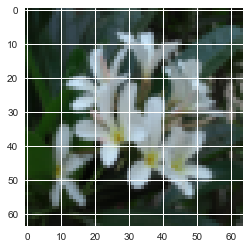

In [10]:
m = train_x_orig.shape[1];
number = np.random.randint(0,m-1)
plt.imshow(train_x_orig[number])

As usual, you reshape and standardize the images before feeding them to the network. The code is given in the cell below.
<img src="images/imvectorkiank.png" style="width:500px;height:300px;">
<center> <u>Figure 1.</u> Image to vector conversion </center>

## 9.4 Dataset preprocessing

In [11]:
#flatting
m_train = train_x_orig.shape[0] # number training examples
m_test = test_x_orig.shape[0] #number test examples

train_x_flatten = train_x_orig.reshape(m_train, 64*64*3).T
test_x_flatten = test_x_orig.reshape(m_test, 64*64*3).T


In [12]:
print ("New shape of training dataset: {}".format(train_x_flatten.shape))
print ("New shape of test dataset: {}".format(test_x_flatten.shape))

New shape of training dataset: (12288, 209)
New shape of test dataset: (12288, 50)


In [13]:
#normalize
train_x_norm = train_x_flatten / 255.
test_x_norm = test_x_flatten / 255.

## 9.5 Cats classification with my_DNN_model

### 9.5.1 Model training

In [ ]:
n_x = train_x_norm.shape[0]
n_h = 1
n_y = 1
parameters = my_DNN_model(X = train_x_norm, Y = train_y, layers_dims = (n_x,n_h,n_y),X_valid = test_x_norm, Y_valid = test_y, learning_rate=0.1)

### 9.5.2 Predict and compute accuracy

In [ ]:
targets_train = predict(X = train_x_norm, parameters=parameters)
targets_test = predict(X = test_x_norm, parameters=parameters)
print ("Accuracy on training set: " + str(accuracy(y_pred=targets_train, y_true=train_y)))
print ("Accuracy on test set: " + str(accuracy(y_pred=targets_test, y_true=test_y)))

# 10. Union my model in one class

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [1]:
class my_DNN_model:
    
    def __init__ (self, layers_dims, learning_rate = 0.0075, num_epochs = 2000, print_cost = True):
        self.num_epochs = num_epochs
        self.learning_rate = learning_rate
        self.layers_dims = layers_dims
        self.print_cost = print_cost
        
    def fit (self, x_train, y_train, x_valid, y_valid):
        self.parameters = self.__init_parameters()
        costs = dict()
        costs['train'] = list()
        costs['valid'] = list()

        for epoch in range(1, self.num_epochs + 1):
            AL, caches = self.__model_forward(x_train)
            cost_train = self.compute_cost(AL=AL, Y=y_train)
            #compute validation cost error
            AL_valid, caches_valid = self.__model_forward(X = x_valid)
            cost_valid = self.compute_cost(AL=AL_valid,Y=y_valid)

            if self.print_cost and epoch%100 == 0:
                print ("Cost after epoch " + str(epoch) + " : train = " + str(cost_train) + "; valid = " + str(cost_valid) )
                costs['train'].append(cost_train)
                costs['valid'].append(cost_valid)

            grads = self.__model_backward(AL=AL, Y=y_train, caches=caches)
            self.parameters = self.__update_parameters(grads)

        #self.__plot_cost_errors(costs)
    def predict(self,x_test, threshold):
        AL, caches = self.__model_forward(x_test)
        targets = (AL > threshold)
        return targets    
    #network weights initiliazation
    def __init_parameters(self):
        """
        Arguments:
            layers_dims - turple of of size L (number nn layers). Each element  i.e layers_dims[i] is number
            of neurans in layer i.

        Return:
            parameters - dict weights of neural network ({"W1":[...],"b1":[...],...})  
        """
        parameters = dict();
        L = len (self.layers_dims) - 1;

        for l in range(1, L + 1): # l = 1,2,3...L
            parameters['W' + str(l)] = np.random.randn(self.layers_dims[l],self.layers_dims[l-1])*0.01;
            parameters['b' + str(l)] = np.zeros((self.layers_dims[l],1));

        return parameters;
    #function activations 
    def __relu(self, Z):
        """
        Arguments:
                Z- weighted sum of input for corresponding layer, i.e. for layer 2 Z2 = np.dot(W2,A1) + b2;

        Returns: 
                ReLu value of Z (max(0,Z))
        """
        return np.maximum(0,Z);
    def __sigmoid(self,Z):
        """
        Arguments:
                Z - weighted sum of input for corresponding layer, i.e. for layer 2 Z2 = np.dot(W2,A1) + b2;

        Returns:
                Sigmoid value of Z
        """
        return 1/(1 + np.exp(-Z))
    def __divide_sigmoid(self, Z):
        return self.__sigmoid(Z)*(1 - self.__sigmoid(Z));
    def __divide_relu(self, Z):
        Z[Z<0] = 0
        Z[Z>0] = 1
        return Z
    #forward propagation
    def __model_forward(self, X): 
        caches = [];
        L = len(self.parameters) // 2;
        A_prev = X;

        for l in range(1,L):
            W = self.parameters["W" + str(l)];
            b = self.parameters["b" + str(l)];
            A_prev, current_cache = self.__linear_activation_forward(A_prev, W, b, activation = "relu");
            caches.append(current_cache);

        AL, current_cache = self.__linear_activation_forward(A_prev, self.parameters["W" + str(L)], self.parameters["b" + str(L)], activation = "sigmoid" );
        caches.append(current_cache)
        return AL, caches;
    def __linear_activation_forward(self, A_prev, W, b, activation):    
        Z, activation_cache = self.__linear_forward(A_prev, W, b); #
        #print ('linear_activ_forw:')
        #print(Z.shape)
        if activation == "relu":
            A = self.__relu(Z);
        elif activation == "sigmoid":
            A = self.__sigmoid(Z);
        #print (A.shape)
        #print('------------')
        linear_cache = (A_prev, W, b)
        caches = (linear_cache, activation_cache)
        return A, caches;
    def __linear_forward(self, A_prev, W, b):
        Z = np.dot(W,A_prev) + b;
        cache = Z
        return Z, cache;
    
    #compute cost
    def compute_cost(self, AL, Y):
        m = Y.shape[1];
        return -np.sum(Y*np.log(AL) + (1 - Y)*np.log(1 - AL))/m
    
    #backward propagation
    def __model_backward(self, AL, Y, caches): 
        grads = dict();
        L = len(caches)

        dAL = - ( np.divide(Y,AL) - np.divide(1 - Y, 1 - AL));
        dA_prev = dAL
        current_cache = caches[L-1] # 0,1,2,...,L-1
        grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = self.__linear_activation_backward(  dAL, current_cache, activation = "sigmoid");
        for l in range(L - 1, 0, -1):
            current_cache = caches[l-1];
            grads["dA" + str(l-1)], grads["dW" + str(l)], grads["db" + str(l)] = self.__linear_activation_backward(grads['dA' + str(l)], current_cache,  activation = "relu")
        return grads;
    def __linear_activation_backward(self, dA, cache, activation):

        linear_cache, activation_cache = cache
        if activation == 'sigmoid':
            dZ = self.__sigmoid_backward(activation_cache, dA)
            dA_prev, dW, db = self.__linear_backward(linear_cache, dZ)
        elif activation == 'relu':
            dZ = self.__relu_backward(activation_cache, dA)
            dA_prev, dW, db = self.__linear_backward(linear_cache, dZ)

        return dA_prev, dW, db
    def __linear_backward(self, linear_cache, dZ):
        A_prev, W, b = linear_cache
        m = A_prev.shape[1]

        dW = np.dot(dZ, A_prev.transpose()) / m;
        db = np.sum(dZ, axis = 1, keepdims = True) / m;
        dA_prev = np.dot(W.transpose(),dZ)
        return dA_prev, dW, db
    def __sigmoid_backward(self, Z, dA):
        return dA*self.__divide_sigmoid(Z);
    def __relu_backward(self, Z, dA):
        dZ = dA * self.__divide_relu(Z);
        return dZ;
    
    #update parameters
    def __update_parameters (self, grads):
        parameters = self.parameters
        L = len(parameters) // 2
        for l in range(1, L + 1):
            parameters['W' + str(l)] = parameters['W' + str(l)] - self.learning_rate*grads['dW' + str(l)];
            parameters['b' + str(l)] = parameters['b' + str(l)] - self.learning_rate*grads['db' + str(l)];
        return parameters;
    #plot costs value
    def __plot_cost_errors_plotly(self, costs):
        # создаем линию для числа проданных копий
        trace0 = go.Scatter(
            x = np.arange(100,self.num_epochs + 100,100),
            y = np.squeeze(costs['train']),
            name='train error'
        )
        
        trace1 = go.Scatter(
            x = np.arange(100,self.num_epochs + 100,100),
            y = np.squeeze(costs['valid']),
            name='test error'
        )
        # определяем массив данных и задаем title графика в layout
        data = [trace0, trace1]
        layout = {'title': 'LogLoss value'}

        # cоздаем объект Figure и визуализируем его
        fig = go.Figure(data=data, layout=layout)
        iplot(fig, show_link=False)
        
    def __plot_cost_errors(self, costs, image_name_to_save = 'errors.png'):
    
        plt.plot(range(100,self.num_epochs + 100,100),np.squeeze(costs['train']))
        plt.plot(range(100,self.num_epochs + 100,100), np.squeeze(costs['valid']))

        font = {'color':'black', 'fontname':'Arial', 'weight':'normal'}

        plt.ylabel('cost', size = 15, fontdict = font)
        plt.xlabel('iterations (per tens)', size = 15, fontdict = font)

        plt.title("Learning rate =" + str(self.learning_rate),  size = 20, color = 'black', fontname = 'Arial', weight = 'normal')

        plt.xticks(size = 12, color = 'black', fontname = 'Arial', weight = 'normal')
        plt.yticks(size = 12, color = 'black', fontname = 'Arial', weight = 'normal')

        plt.xlim(100,self.num_epochs)
        plt.legend(['Train error','Validation error'], loc = 'upper right')
        plt.savefig(image_name_to_save, bbox_inches  = 'tight')

In [ ]:
n_x = train_x_norm.shape[0]
n_h = 1
n_y = 1
model = my_DNN_model((n_x,n_h,n_y),num_epochs=1300)
model.fit(train_x_norm, train_y, test_x_norm, test_y)
targets = model.predict(test_x_norm, 0.6)
print ("Accuracy on test set: " + str(accuracy_score(y_pred=targets, y_true=test_y)))

In [ ]:
def my_recall_score(y_pred, y_true):
    return np.sum(y_pred*y_true)/np.sum(y_true);
def FPR_def(y_pred, y_true):
    FP = np.sum((1-y_true)*y_pred)
    return FP/np.sum(1 - y_true)

In [ ]:
# TPR - Recall for positiv class

TPR = list ()
for threshold in np.arange(0,1.05,0.05):
    targets = model.predict(test_x_norm,threshold=threshold)
    recall = my_recall_score(y_pred = targets,y_true=test_y)
    TPR.append(recall)
plt.plot(np.arange(0,1.05,0.05), TPR)
font = {'color':'black', 'fontname':'Arial', 'weight':'normal', 'size':'15'}
plt.xlabel('Threshold', fontdict = font)
plt.ylabel('TPR', fontdict = font)
plt.show()

In [ ]:
# FPR
# TPR - Recall for positiv class

FPR = list ()

for threshold in np.arange(0,1.05,0.05):
    targets = model.predict(test_x_norm,threshold=threshold)
    recall = FPR_def(y_pred = targets,y_true=test_y)
    FPR.append(recall)
plt.plot(np.arange(0,1.05,0.05), FPR)
font = {'color':'black', 'fontname':'Arial', 'weight':'normal', 'size':'15'}
plt.xlabel('Threshold', fontdict = font)
plt.ylabel('FPR', fontdict = font)
plt.show()

In [ ]:
# join
plt.plot(np.arange(0,1.05,0.05), FPR)
plt.plot(np.arange(0,1.05,0.05), TPR)
font = {'color':'black', 'fontname':'Arial', 'weight':'normal', 'size':'15'}
plt.xlabel('Threshold', fontdict = font)
plt.ylabel('FPR/TPR', fontdict = font)
plt.legend(['FPR','TPR'], loc = 'upper right')
plt.show()

In [ ]:
# precision 
def my_precision_score(y_pred, y_true):
    return np.sum(y_pred*y_true)/np.sum(y_pred)

In [ ]:
# precision(threshold)
precision = list ()
for threshold in np.arange(0,1.05,0.05):
    targets = model.predict(test_x_norm,threshold=threshold)
    prec = my_precision_score(y_pred = targets,y_true=test_y)
    precision.append(prec)
plt.plot(np.arange(0,1.05,0.05), precision)
font = {'color':'black', 'fontname':'Arial', 'weight':'normal', 'size':'15'}
plt.xlabel('Threshold', fontdict = font)
plt.ylabel('Precision', fontdict = font)
plt.show()

In [ ]:
# ploting roc-auc curve
plt.plot(np.array(FPR), np.array(TPR))
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), linestyle = '--', color = 'red')
font = {'color':'black', 'fontname':'Arial', 'weight':'normal', 'size':'15'}
plt.xlabel('FPR', fontdict = font)
plt.ylabel('TPR', fontdict = font)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#actual = [1,1,1,0,0,0]
#predictions = [0.9,0.9,0.9,0.1,0.1,0.1]
#false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
#roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc = auc(FPR, TPR)
print (roc_auc)

In [ ]:
class activations:
    @staticmethod
    def relu(Z):
        """
        Arguments:
                Z- weighted sum of input for corresponding layer, i.e. for layer 2 Z2 = np.dot(W2,A1) + b2;

        Returns: 
                ReLu value of Z (max(0,Z))
        """
        return np.maximum(0,Z);
    @staticmethod
    def sigmoid(Z):
        """
        Arguments:
                Z - weighted sum of input for corresponding layer, i.e. for layer 2 Z2 = np.dot(W2,A1) + b2;

        Returns:
                Sigmoid value of Z
        """
        return 1/(1 + np.exp(-Z))
    @staticmethod
    def divide_sigmoid(Z):
        return activations.sigmoid(Z)*(1 - activations.sigmoid(Z));
    @staticmethod
    def divide_relu(Z):
        Z[Z<0] = 0
        Z[Z>0] = 1
        return Z